In [66]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
conn = sqlite3.connect('who_suicide_data.db')

def run_query(query):
    return pd.read_sql(query, conn)

In [87]:
df = run_query("select * from suicides")
df.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,,277900
1,Albania,1985,female,25-34 years,,246800
2,Albania,1985,female,35-54 years,,267500
3,Albania,1985,female,5-14 years,,298300
4,Albania,1985,female,55-74 years,,138700


In [38]:
query = """
    select country, sex, sum(suicides_no) as 'no_of_suicides'
    from suicides group by country,sex
"""
df1 = run_query(query)
df1.head()

,country,sex,no_of_suicides
0,Albania,female,693.0
1,Albania,male,1277.0
2,Anguilla,female,0.0
3,Anguilla,male,2.0
4,Antigua and Barbuda,female,1.0


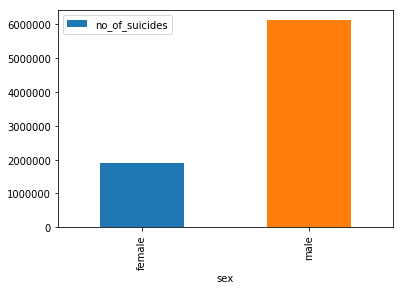

In [34]:
df1.plot(x='sex', y= 'no_of_suicides', kind = 'bar')

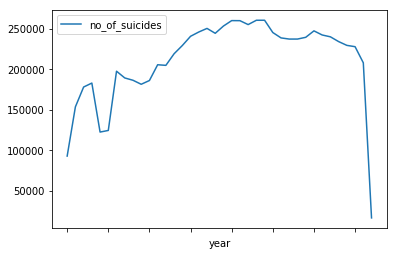

In [44]:
query = """
    select year, sum(suicides_no) as 'no_of_suicides'
    from suicides group by year
"""
df2 = run_query(query)
df2.plot(x='year', y= 'no_of_suicides', kind = 'line')

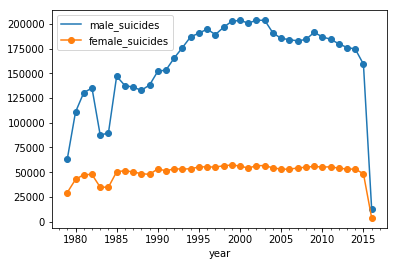

In [91]:
query = """
    select 
        year,
        sum(case when sex = 'male' then suicides_no else 0 end) as male_suicides,
        sum(case when sex = 'female' then suicides_no else 0 end) as female_suicides  
    from suicides 
    group by year
"""
df2 = run_query(query)
df2['year'] = pd.to_datetime(df2.year)
ax1 = df2.plot(x='year', y='male_suicides', kind = 'line', style='o-')
df2.plot(x='year', y='female_suicides', kind ='line', ax=ax1, style='o-')

In [108]:
query = """
    select 
        country,sex,sum(suicides_no)/population as num_suicides, 
        (select average(sum(suicides_no/population)) from suicides group by country, year)
    from suicides 
    group by country, sex
    order by 3 desc
"""
df3 = run_query(query)
df3.head()


,country,sex,num_suicides
0,Russian Federation,male,1221474.0
1,United States of America,male,947792.0
2,Japan,male,639281.0
3,Japan,female,298333.0
4,Ukraine,male,293561.0


In [136]:
query = """
with suicides_with_avg_prop as (
select 
    country,year, 
    1.0 * sum(suicides_no) / sum(population) as suicide_proportion
from suicides group by country, year
)

select 
    country, 
    avg(suicide_proportion) * 100000 as number_in_100000 
from suicides_with_avg_prop
group by country 
order by 2 desc
"""
df4=run_query(query)
df4

,country,number_in_100000
0,Lithuania,37.593580
1,Hungary,35.079436
2,Sri Lanka,33.017981
3,Russian Federation,30.720675
4,Latvia,30.312302
5,Slovenia,28.569105
6,Estonia,27.664203
7,Kazakhstan,25.217770
8,Ukraine,23.914649
9,Belarus,23.517507
